### With exponential smoothing recent observation have more weight than the older ones.
### The aim is to explain the time series with three parameters:
#### 1. error - additive, multiplicative (x > 0)
#### 2. trend - non-present, additive, multiplicative
#### 3. seasonality - non-present, additive, multiplicative
### Multiplicative Holt-Winters model - additive trend and multiplicative seasonality

## R functions for exponential smoothing:

#### - ses() - simple exponential smoothing: datasets without trend and seasonality
#### - holt() - Holt linear exponential smoothing: datasets with trend and with no seasonality [argument 'damp' for damping down the trend over time]
#### - hw() - Holt-Winters seasonal exponential smoothing: datasets with trend and seasonality + a damping parameter

### - ets() - automated model selection, and models can be customized
#### required argument: data
#### argument 'model' for preselecting a model
#### - default is 'ZZZ' for automatic selection of the three components (error, trend, and seasonality)
#### - or manually: 'A' for additive, 'M' for multiplicative, 'N' for non-present     
### smoothing coefficients:
####           - alpha - initial level, or error
####           - beta - trend
####           - gama - seasonality
####           - phi - damping parameter
#### * reactive models rely more on recent data (high coefficient closer to 1)
#### * smooth models account on all data (low coefficient closer to 0)

## Implementation

In [3]:
library('forecast')

### Choosing the model automatically

In [43]:
# using function ets() on the nottem dataset (Average Monthly Temperatures at Nottingham, 1920–1939)
etsmodel = ets(nottem);
etsmodel

ETS(A,N,A) 

Call:
 ets(y = nottem) 

  Smoothing parameters:
    alpha = 0.0392 
    gamma = 1e-04 

  Initial states:
    l = 49.4597 
    s = -9.5635 -6.6186 0.5447 7.4811 11.5783 12.8567
           8.9762 3.4198 -2.7516 -6.8093 -9.7583 -9.3556

  sigma:  2.3203

     AIC     AICc      BIC 
1734.944 1737.087 1787.154 

#### Output explanation:

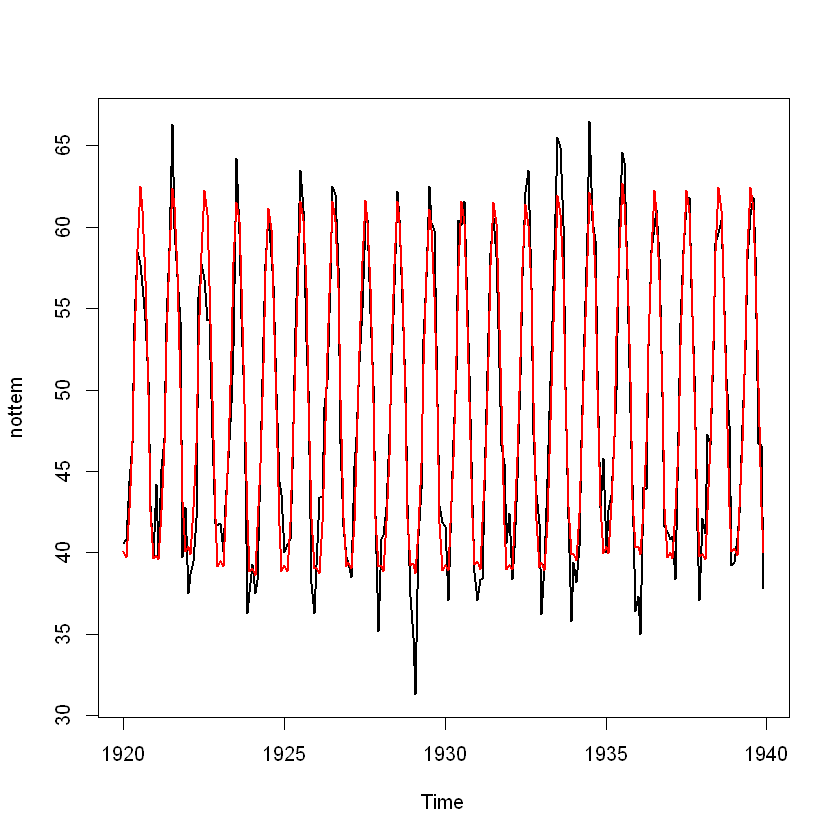

In [10]:
# plotting the model vs original
plot(nottem, lwd = 2)
lines(etsmodel$fitted, col = "red", lwd = 2)
# fitted values with ETS model in red are close to the original ones, which means that the model is good, and it does not catch the very extreme (random) values

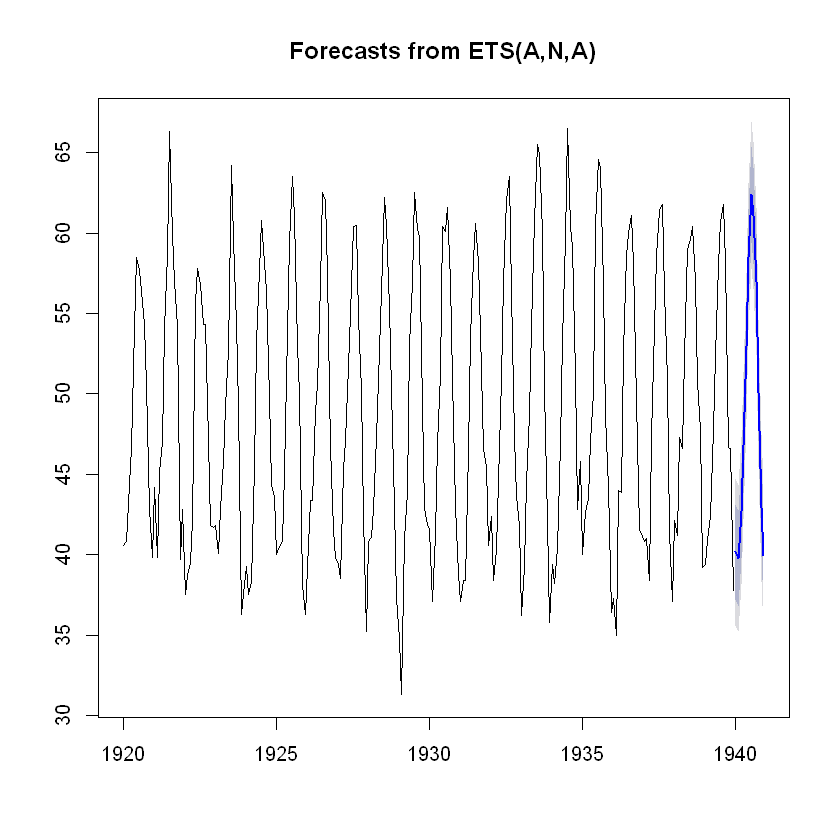

In [17]:
# plotting the forecast for one year / 12 months
plot(forecast(etsmodel, h = 12))
# grey around blue is the prediction interval
# default prediction intervals: 80% (darker grey) and 95% (lighter grey)

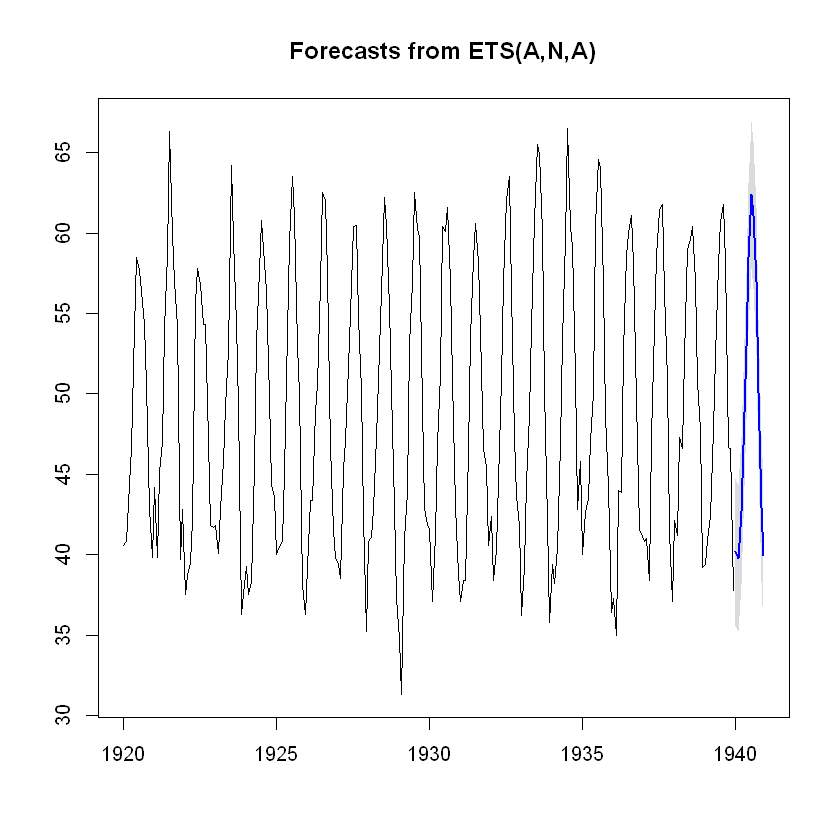

In [22]:
# changing the prediction interval (ommiting 80% accuracy)
plot(forecast(etsmodel, h = 12, level = 95))

### Choosing the model manually

In [50]:
# for example, multiplicative error, additive trend, and multiplicative seasonality
etsmodel_manual = ets(nottem, model ="MNM");
etsmodel_manual
# alpha slightly lower - more of error smoothing than in the automatic model
# lower sigma - lower model accuracy than for the automatic model
# higher model quality indicators - model not as good as the automatic one

ETS(M,N,M) 

Call:
 ets(y = nottem, model = "MNM") 

  Smoothing parameters:
    alpha = 0.0214 
    gamma = 1e-04 

  Initial states:
    l = 49.3793 
    s = 0.8089 0.8647 1.0132 1.1523 1.2348 1.2666
           1.1852 1.0684 0.9405 0.8561 0.8005 0.8088

  sigma:  0.0508

     AIC     AICc      BIC 
1761.911 1764.054 1814.121 

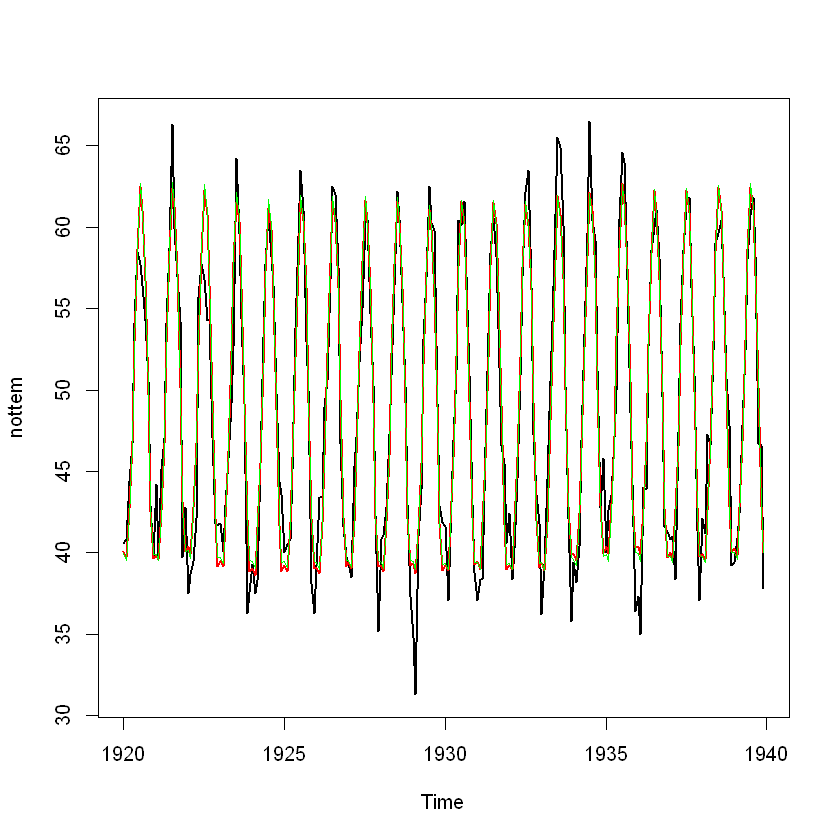

In [51]:
# plotting the manual model (green) vs automatic (red) vs original
plot(nottem, lwd = 2)
lines(etsmodel$fitted, col = "red", lwd = 2)
lines(etsmodel_manual$fitted, col = "green", lwd = 1)
# fitted values with this manual ETS model in green are somewhat father from the original ones than with the automatically selected model